In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table, join
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [24]:
from   schechter         import schechter
from   SV3.define_sample import define_sample
from   ajs_kcorr         import ajs_kcorr
from   ref_gmr           import reference_gmr
from   params            import params

In [4]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_v0.1.fits')
bright_merge_obs

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,1.0504202,True,1.0120848
212.13195284744052,-2.1397232701515705,0.0,0.0,0.0,0.0,39627733927463584,0.3064671342899772,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1442,532,5321442,8181.238723360002,650.8494234496903 .. 26.321080977338845,0.18489118881349448,8.151114524677556e-05,0,7898,GALAXY,,10,121.69535649672616,515,0,TGT,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,20210512,88162,59347.28192359,2839.2163,1.7219174,1.4668155,4295.8286,2.4269316,4.082689,5179.0156,2.3733006,4.9972258,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,1152921504606846976,131074,0,6.960086,14.839426,41.38945,0.83804214,0.8877909,19.571457,19.379622,18.457775,18.328552,20.393463,20.26424,1.1136818,1.0510693,1.0504202,True,1.0099682
212.14293772910978,-2.127708100431868,0.0,0.0,0.0,0.0,39627733927463809,0.9682231030567523,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1464,529,5291464,8649.267828658223,482.3641546970651 .. 28.304609010743402,0.18572600120311122,5.0569333051126286e-05,0,7825,GALAXY,,10,491.2810438387096,524,0,TGT,174.46136,-357.95212,102100,0.007,-0.013,836.0849,0.7045758604118871,20210507,87604,59342.33186133,5241.1284,3.161646,2.7221062,9271.688,5.1619253,7.320931,11833.8,5.418451,9.364234,0.014638815,7.937166,115.9185,0.43463737,0.1699

In [5]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_derived_v0.1.fits')
derived

TARGETID,ROSETTE,BGS_Z_WEIGHT,VOLUME,MRH,ZMAX,IVMAX,VONVMAX
float64,float64,float64,float64,float64,float64,float64,float64
3.9627733927462344e+16,-1.0,1.0120848417282104,6557842.902912342,-19.881173918302483,0.21445029728502413,1.3821299406662422e-07,0.9063791022300773
3.962773392746358e+16,-1.0,1.0099681615829468,4388413.147925923,-20.70733488751636,0.29628868288639787,4.546607037932931e-08,0.1995239010371741
3.962773392746381e+16,-1.0,1.0021929740905762,4455176.688937193,-21.046547705446496,0.3332149454558418,3.0117479118558124e-08,0.13417869089855283
3.9627733927464616e+16,-1.0,1.0001806020736694,84719.66939856742,-19.680466316967664,0.19446983251551314,1.9232488257010465e-07,0.016293700468457566
3.962773392746479e+16,-1.0,1.0094077587127686,15168192.40685058,-20.737353369447934,0.29644961910733025,4.538002435275527e-08,0.688332940810157
3.962773392746482e+16,-1.0,1.051695466041565,186251751.07163233,-22.389196348151586,0.5420945363068553,5.226892593118717e-09,0.973517898131706
3.962773392746541e+16,-1.0,1.0092251300811768,13263605.969136443,-20.714648935395925,0.29262655902175044,4.748089537698635e-08,0.6297678873421391
3.962773392746584e+16,-1.0,1.0278266668319702,26279255.263864897,-20.92749320908252,0.32988940538656114,3.120084616351229e-08,0.8199350007795193
3.962773393165839e+16,-1.0,1.002821922302246,1326557.0497325193,-20.376518938389612,0.2757939624700396,5.833620069946388e-08,0.07738629829248493


In [6]:
isin                   = define_sample(bright_merge_obs)

bright_merge_obs       = bright_merge_obs[isin]
derived                = derived[isin]

Selecting 94.818% of sample


In [7]:
toofar = bright_merge_obs[derived['VONVMAX'] > 1.0]
toofar

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32
217.21676984362085,32.77780211427455,0.0,0.0,0.0,0.0,39632936139491268,0.08333054879654478,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:05:09,0.57.0,1416,211,2111416,8722.682087913854,559.2225719248246 .. 9.857657208288574,0.1302087784193566,0.00010248692350027508,0,7899,GALAXY,,10,53.605026193661615,510,0,TGT,129.6352,-381.0316,102100,0.004,0.0,320.4746,0.7387179042632717,20210501,86841,59336.22817923,2505.1616,1.4835588,1.0571086,3042.0312,1.7326071,2.5996573,3397.8582,1.539371,3.0056772,0.012947371,7.441811,99.80825,0.39070615,0.14508192,4.685143,0.0062322,410.72354,0.75793624,6.5416923,14.664134,0.0,874.0658,3.656505,7.95768,19.362225,7.4480433,1384.5977,4.8051476,14.644455,1152921504606846976,514,0,4.81381,6.444304,15.204901,0.978968,0.98578346,20.47706,20.453981,19.54504,19.529495,20.793777,20.77823,0.9320202,0.92448616,1.0504202,True,1.0291436
217.68838965871055,32.8317393912793,0.0,0.0,0.0,0.0,39632936147878171,0.704015235278074,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:05:09,0.57.0,504,202,2020504,8145.520632609725,519.8845446857332 .. 18.678485576805816,0.22180331259636166,2.639214955812388e-05,0,7901,GALAXY,,10,450.8720708042383,465,0,TGT,-7.740479,-395.0938,102100,-0.002,0.005,303.177,0.7420362143425178,20210410,84248,59315.49661784,3247.1162,1.7980804,1.3365333,3484.822,1.9217479,3.1085865,3692.0332,1.6614105,3.2837448,0.019117977,18.336817,120.010414,0.68478763,0.13103877,4.662233,0.010055397,529.36786,0.85639435,6.8538265,17.927246,0.0,789.87823,3.9662418,8.312567,22.608597,18.346872,1439.2566,5.507424,15.297432,1152921504606846976,514,0,5.6870227,8.0387745,15.160154,0.9770785,0.98450136,20.237026,20.21185,19.54824,19.53128,20.612787,20.595829,0.68878555,0.6805687,1.0504202,True,1.0179427
217.75585469483534,32.775409798165015,0.0,0.0,0.0,0.0,39632936147879040,0.5995776927725224,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:05:09,0.57.0,508,203,2030508,8256.9789487198,636.3851728234047 .. 17.51854753888524,0.4113923497011761,6.200704718488906e-05,0,7887,GALAXY,,10,264.67167069017887,191,0,TGT,30.225824,-389.02597,102100,0.009,0.009,337.465,0.7352034162573557,20210412,84527,59317.39784357,1495.9583,0.77878064,0.535104,3145.1191,1.751715,2.6370664,4080.7043,1.8693626,3.4933183,0.013424907,9.957471,94.55537,0.4363214,0.12496604,4.1853023,0.0070

In [8]:
np.unique(toofar['TARGET_STATE'], return_counts=True)

(<Column name='TARGET_STATE' dtype='bytes30' length=3>
 BGS|MORE_ZGOOD
 BGS|MORE_ZWARN
      BGS|UNOBS,
 array([   3,   61, 2851]))

In [9]:
np.unique(toofar['ZWARN'], return_counts=True)

(<Column name='ZWARN' dtype='int64' length=1>
 0,
 array([2915]))

In [10]:
np.unique(toofar['ZTILEID'], return_counts=True)

(<Column name='ZTILEID' dtype='int32' length=38>
  -1
  93
  94
  98
 174
 175
 176
 181
 182
 201
 202
 203
 ...
 390
 391
 396
 398
 421
 422
 555
 556
 557
 559
 589
 590,
 array([2851,    2,    1,    2,    3,    4,    1,    2,    1,    3,    4,
           1,    1,    2,    3,    3,    1,    4,    2,    2,    1,    2,
           1,    1,    1,    1,    1,    2,    1,    1,    2,    1,    1,
           1,    1,    1,    2,    1]))

In [11]:
# bright_merge_obs.dtype.names

In [12]:
joined             = join(derived, bright_merge_obs['TARGETID', 'FIBER_RMAG_DRED', 'RMAG_DRED', 'GMR_DRED', 'Z'], join_type='left', keys='TARGETID')

In [13]:
joined['RMAG_IDX'] = np.digitize(joined['MRH'], bins=np.arange(-24.0, -11.0, 1.))

In [14]:
np.sort(joined['RMAG_IDX'].data)

array([ 0,  0,  1, ..., 13, 13, 13])

Text(0, 0.5, 'Counts per $\\Delta z = 0.05$')

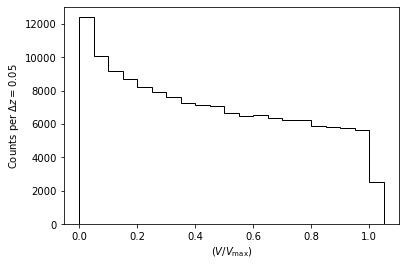

In [15]:
dz = 0.05
_  = pl.hist(derived['VONVMAX'], bins=np.arange(0.0, 1.1, dz), histtype='step', color='k')

pl.xlabel(r'$(V / V_{\rm max})$')
pl.ylabel('Counts per $\Delta z = {:.2f}$'.format(dz))

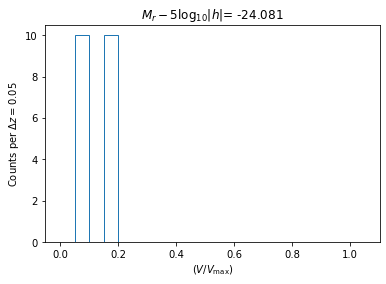

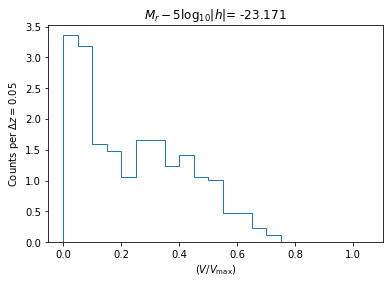

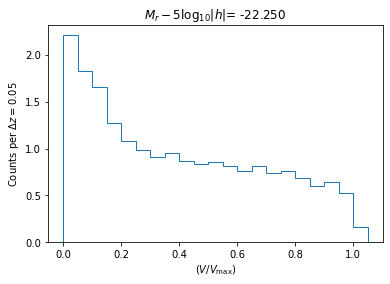

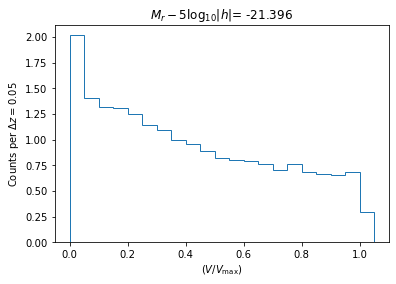

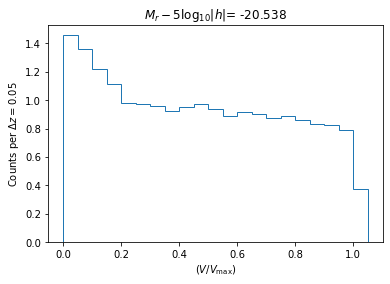

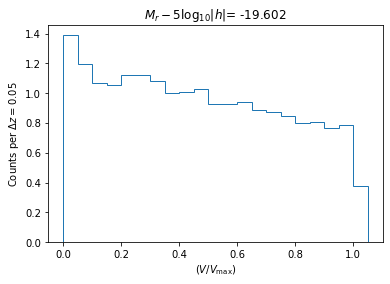

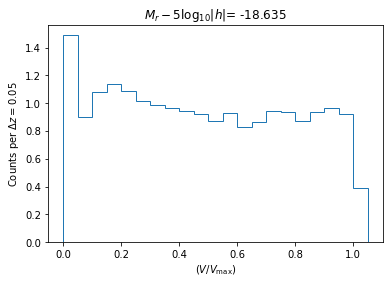

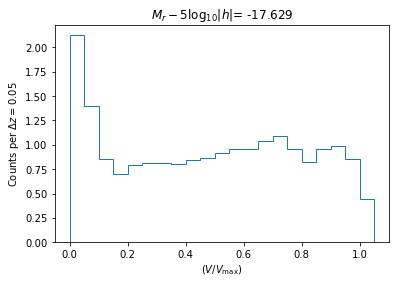

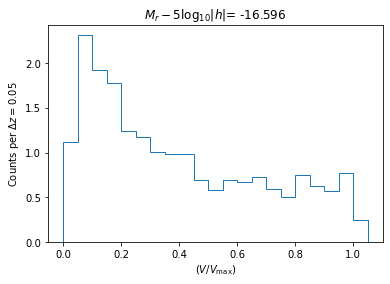

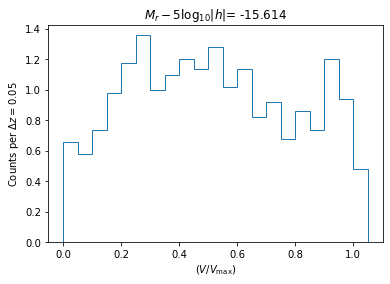

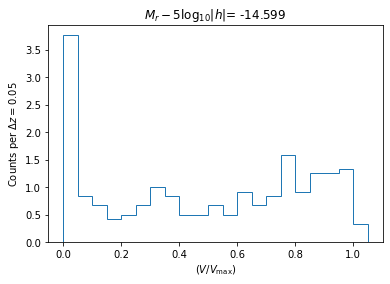

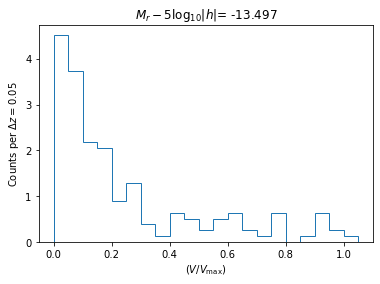

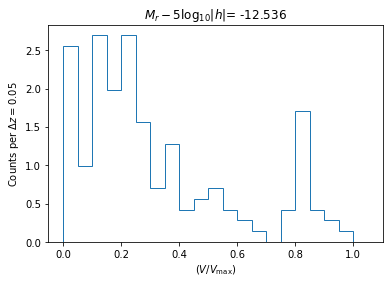

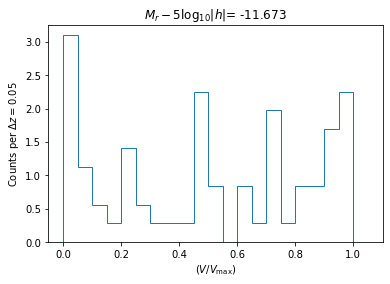

In [16]:
dz = 0.05

for idx in np.arange(0, 14, 1):
    sample  = joined[joined['RMAG_IDX'] == idx]
    _       = pl.hist(sample['VONVMAX'], bins=np.arange(0.0, 1.1, dz), histtype='step', density=True)

    med_mrh = np.median(sample['MRH'].data)
    
    title   = r'$M_r - 5 \log_{10}|h|$' + '= {:.3f}'.format(med_mrh)
    
    pl.xlabel(r'$(V / V_{\rm max})$')
    pl.ylabel('Counts per $\Delta z = {:.2f}$'.format(dz))

    pl.title(title)
        
    pl.show()

(-0.1, 0.8)

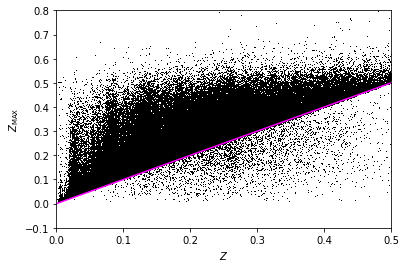

In [18]:
xs = np.arange(-0.1, 0.6, 0.01)

pl.plot(joined['Z'], joined['ZMAX'], marker=',', lw=0.0, c='k')
pl.plot(xs, xs, c='magenta')

pl.xlabel(r'$Z$')
pl.ylabel(r'$Z_{\rm MAX}$')

pl.xlim(0.0,  0.5)
pl.ylim(-0.1, 0.8)

In [19]:
problematic = joined[joined['Z'] >= joined['ZMAX']]
problematic

TARGETID,ROSETTE,BGS_Z_WEIGHT,VOLUME,MRH,ZMAX,IVMAX,VONVMAX,FIBER_RMAG_DRED,RMAG_DRED,GMR_DRED,Z,RMAG_IDX
float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,int64
3.962773394004678e+16,-1.0,1.0037102699279785,5957467.936496103,-20.146171240127014,0.23529042608724102,1.0078461217913759e-07,0.6004210955494069,20.645136,18.880047,1.441906,0.32713371777040684,4
3.9627733944239816e+16,-1.0,1.0964438915252686,476380.3048642823,-18.958886026345297,0.15088000750371094,4.479401686720198e-07,0.21338987411293484,21.241222,19.04628,0.8278942,0.20385598012154257,6
3.9627733944241e+16,-1.0,1.0088708400726318,12120998.881001588,-20.55126363387536,0.3042481879821217,4.1445631788755185e-08,0.5023624565339054,20.493614,19.318794,1.2985783,0.47857908679093286,4
3.962773394843375e+16,-1.0,1.0009535551071167,60117.848748262746,-18.886451656647996,0.1418956057238625,5.482754954541519e-07,0.03296114330809152,19.826847,18.623808,1.3228436,0.23627139723862076,6
3.962773399876578e+16,-1.0,1.0086987018585205,17594156.03017795,-20.721496283626927,0.29391164572935324,4.6761275582381e-08,0.8227251787665616,20.848017,19.305674,1.4918728,0.40276810850214506,4
3.962773997145505e+16,-1.0,1.0049967765808105,16379845.559967326,-20.917099595846338,0.3159976807125943,3.6294660699217756e-08,0.5945009369046025,20.666277,19.440523,1.5034866,0.37683760736846655,4
3.96277399756518e+16,-1.0,1.0065374374389648,930262.0274963964,-19.17469733838812,0.16146803943394603,3.5792475718136295e-07,0.3329638103066901,19.608803,18.75834,1.127161,0.1737907408753077,5
3.962773998404015e+16,-1.0,1.0009013414382935,230888.84306484743,-18.615821464615287,0.12579926617109605,8.129474910074963e-07,0.1877005056711913,20.073631,19.113958,1.1962852,0.20432468809303386,6
3.962773998404158e+16,-1.0,1.0065914392471313,223461.79363271603,-18.47325118195174,0.1185283614372757,9.865985932640855e-07,0.220467091246307,20.687258,18.99016,0.47972298,0.15879490722999587,6


In [21]:
kcorrector = ajs_kcorr()

In [ ]:
ref_gmr    = reference_gmr(kcorrector, problematic['GMR_DRED'], problematic['Z'], zref=params['ref_z'])

# Done.